In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


## step 1 Finding the Correlation between the features

<AxesSubplot:>

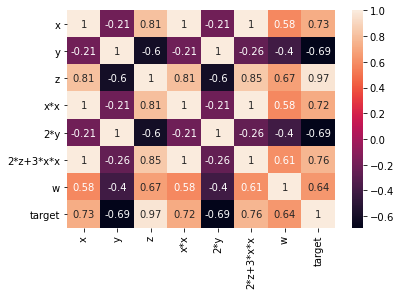

In [4]:
import seaborn as sn

corr_df=data.corr()
corr=np.array(corr_df)
label=list(data)                                       #ylabel from data heading
sn.heatmap(data=corr,annot=True,xticklabels=label,yticklabels=label)

## step 2 Finding the best model for the given data

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state = 42,test_size=0.2)

parameters = {'C':(np.logspace(-5,8,10))}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
#https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

log_reg=LogisticRegression()
log_reg_cv = GridSearchCV(log_reg, parameters,n_jobs=-1,return_train_score=True,cv=cv)
log_reg_cv.fit(X, Y)                                     # fitting on whole data for find out best hyperparameter 



print("best parameter = ",log_reg_cv.best_params_)
print("best score = ",log_reg_cv.best_score_)
print("best estimator = ",log_reg_cv.best_estimator_)

best parameter =  {'C': 1e-05}
best score =  1.0
best estimator =  LogisticRegression(C=1e-05)


## step 3 Getting the weights with the original data

In [6]:
# step 3
best_model=LogisticRegression(C=1e-05)
best_model.fit(X_train,y_train)             #fitting training data on best_hyperparameter_model 
y_pred=best_model.predict(X_test)
best_model_accuracy=accuracy_score(y_test, y_pred)  #getting the accuracy

weight=best_model.coef_
print("coef :-",weight)
print("accuracy = ",best_model_accuracy)


coef :- [[ 0.00029657 -0.00026116  0.00037896  0.00029181 -0.00026116  0.00030838
   0.0002199 ]]
accuracy =  0.4


## step 4 Modifying original data

In [7]:
import random
#print(X)
X_=[]
for i in range(len(X)):
    emp=[]
    for j in range(7):
        emp.append(X[i][j]+random.uniform(0.01, 0.09))
    X_.append(emp)
X_=np.array(X_)
for i in range(len(X_)):
    print(X_[i],X[i])

[-0.56308153  0.88729785 -0.94071359 -0.57249938  0.8626915  -0.59763304
 -0.50720968] [-0.5810659   0.84183714 -1.01297765 -0.60402468  0.84183714 -0.66592679
 -0.53627703]
[-0.84493012 -0.13708502 -0.9554204  -0.80189682 -0.13057475 -0.87882336
 -0.48102725] [-0.89430898 -0.2078351  -1.01297765 -0.88305213 -0.2078351  -0.91705408
 -0.52236404]
[-1.14536554  0.29387023 -1.05458741 -1.08129731  0.22349997 -1.14660813
  0.21646736] [-1.20755205  0.21203379 -1.08231219 -1.15091848  0.21203379 -1.16650718
  0.20573767]
[-1.35279836  0.05689629 -0.93251717 -1.20801791  0.07158822 -1.21451326
 -0.61551656] [-1.36417359  0.00209934 -0.94364311 -1.28066624  0.00209934 -1.26653955
 -0.66571996]
[-0.72315843  1.06469864 -0.93773941 -0.65832404  1.08344587 -0.76958451
 -0.67936387] [-0.73768744  1.05177159 -1.01297765 -0.74493354  1.05177159 -0.79274607
 -0.73505412]
[-0.0451491   1.74533538 -0.73402599 -0.09443888  1.72478588 -0.20419299
  0.55104383] [-0.11120129  1.68157493 -0.80497402 -0.164

In [8]:
X_train_,X_test_,y_train,y_test=train_test_split(X_,Y,random_state = 42,test_size=0.2)  #adding error 

best_model.fit(X_train_,y_train)
y_pred_=best_model.predict(X_test_)
best_model_accuracy_edited=accuracy_score(y_test, y_pred_)
print("best_model_accuracy_edited = ",best_model_accuracy_edited)
weight_1=best_model.coef_
print("coef :-",weight_1)

best_model_accuracy_edited =  0.4
coef :- [[ 0.00029688 -0.00026124  0.00037905  0.00029056 -0.00026117  0.00031002
   0.00021826]]


In [9]:
print("different in accuracy = ",best_model_accuracy_edited-best_model_accuracy)

different in accuracy =  0.0


## step 5 Checking deviations in metric and weights

In [11]:
change=weight-weight_1
print("Absolute change in weight = ",change)

per_chan=[]
for i in range(7):
    per_chan.append(abs(change[:,i]/weight[:,i])*100)

print(per_chan)

top=[]
idx=[]
top_fe=[]
fe= label.copy()
for i in range(4):
    idx.append(per_chan.index(max(per_chan)))
    top.append(max(per_chan))
    per_chan.pop(idx[i])
    top_fe.append(fe[idx[i]])
    fe.pop(idx[i])
   
    
print("Top features are = ",top_fe)
print("with change in weight with percentage =",list(top))
    

Absolute change in weight =  [[-3.07476576e-07  8.20232349e-08 -8.99509811e-08  1.24712284e-06
   1.15782681e-08 -1.64045231e-06  1.64688780e-06]]
[array([0.10367701]), array([0.03140726]), array([0.02373631]), array([0.42737671]), array([0.0044334]), array([0.53195253]), array([0.74891423])]
Top features are =  ['w', '2*z+3*x*x', 'x*x', 'x']
with change in weight with percentage = [array([0.74891423]), array([0.53195253]), array([0.42737671]), array([0.10367701])]


## <span style='color:red'> According to logistic regression 'w', '2*z+3*x*x', 'x*x', 'x'' are the most important features by weight of that features. </span>

# Here we start LinearSVC
## step 2

In [32]:
from sklearn.svm import SVC

parameters = {'C':(np.logspace(-5,8,10))}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

lr_svc=SVC(kernel='linear')
lr_svc_cv = GridSearchCV(lr_svc, parameters,n_jobs=-1,cv=cv)
lr_svc_cv.fit(X, Y)                                                   # fitting on whole data for find out best hyperparameter 



print("best parameter = ",lr_svc_cv.best_params_)
print("best score = ",lr_svc_cv.best_score_)
print("best estimator = ",lr_svc_cv.best_estimator_)

best parameter =  {'C': 0.007742636826811269}
best score =  1.0
best estimator =  SVC(C=0.007742636826811269, kernel='linear')


## step 3

In [37]:
best_model_1=SVC(kernel='linear',C=0.007742636826811269)

best_model_1.fit(X_train,y_train)             #fitting training data on best_hyperparameter_model 
y_pred_0=best_model_1.predict(X_test)
best_model_accuracy_1=accuracy_score(y_test, y_pred_0)

w_01=best_model_1.coef_
print("coef :-",w_01)
print("accuracy = ",best_model_accuracy_1)

coef :- [[ 0.16128427 -0.20643167  0.30599434  0.15069928 -0.20643167  0.1725741
   0.12110967]]
accuracy =  1.0


In [36]:
best_model_1.fit(X_train_,y_train)
y_pred_1=best_model_1.predict(X_test_)
best_model_accuracy_edited_1=accuracy_score(y_test, y_pred_1)
print("best_model_accuracy_edited = ",best_model_accuracy_edited_1)
w_12=best_model_1.coef_
print("coef :-",w_12)

best_model_accuracy_edited =  1.0
coef :- [[ 0.16009975 -0.20690403  0.3050217   0.15015462 -0.20592693  0.17426045
   0.12377358]]


In [38]:
print("different in accuracy = ",best_model_accuracy_edited_1-best_model_accuracy_1)

different in accuracy =  0.0


## step 5 Checking deviations in metric and weights with updated data set.

In [39]:
ch=[]

ch=abs(w_01-w_12)


print("Absolute change in weight = ",ch)

per_chan=[]
for i in range(7):
    per_chan.append(abs(ch[:,i]/w_01[:,i])*100)

print(per_chan)

top=[]
idx=[]
top_fe=[]
fe1=label.copy()
for i in range(4):
    idx.append(per_chan.index(max(per_chan)))
    top.append(max(per_chan))
    per_chan.pop(idx[i])
    top_fe.append(fe1[idx[i]])
    fe1.pop(idx[i])
    
print("Top features are = ",top_fe)
print("with change in weight with percentage =",list(top))

Absolute change in weight =  [[0.00118452 0.00047236 0.00097264 0.00054465 0.00050473 0.00168635
  0.00266391]]
[array([0.7344298]), array([0.22882139]), array([0.3178629]), array([0.3614178]), array([0.24450327]), array([0.97717166]), array([2.19958674])]
Top features are =  ['w', '2*z+3*x*x', 'x', 'x*x']
with change in weight with percentage = [array([2.19958674]), array([0.97717166]), array([0.7344298]), array([0.3614178])]


### 1.According to Linear SVM 'w', '2*z+3*x*x', 'x', 'x*x' are the most important features by weights.
### 2.After pertubation test there is not much change in accuracy and weight of feature of the both model in linear SVM and Logistic Regression.
### 3.Some freature are highly correlated to each other in correlation matrix.
